# 基礎集計

**このノートブックでやること**
* 基礎集計、可視化

## インポート

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font=['IPAMincho'])

## イベントデータ読み込み

In [2]:
input_dir = '../event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df

,イベント,2001位,形式,日付,属性,期間
0,Stage Bye Stage,178840,Carnival,2019-07-02,NaN,NaN
1,TRUE COLORS,176743,Carnival,2019-08-31,NaN,NaN
2,夢をのぞいたら,210672,Carnival,2020-01-01,NaN,NaN
3,夢色ハーモニー,45587,Groove,2015-10-31,Vo,198.0
4,流れ星キセキ,48673,Groove,2015-12-04,Vo,222.0
...,...,...,...,...,...,...
90,Athanasia,75775,アタポン,2020-04-20,NaN,174.0
91,不埒なCANVAS,188652,アタポン,2020-05-19,NaN,198.0
92,Sing the Prologue♪,85574,アタポン,2020-06-19,NaN,174.0
93,太陽の絵の具箱,107142,アタポン,2020-07-20,NaN,174.0


## 基礎集計・可視化

### 形式

In [4]:
# 形式別
# --Carnival--
# データ3つのみ
# - 2001位: 平均値が他2つの2倍くらい
# - 期間: データなし
# --Groove--
# - 2001位: 全体的に一番低め。中央値 < 平均値。
# - 期間: 半分以上は174。
# --アタポン--
# - 2001位: 3つの形式では真ん中。中央値 < 平均値。
# - 期間: minはGrooveより小さく、maxはGrooveより大きい
df.groupby('形式').describe().T

形式                Carnival        Groove           アタポン
2001位 count       3.000000      32.00000      60.000000
      mean   188751.666667   87048.56250   94924.383333
      std     19012.498845   35318.85284   42349.249956
      min    176743.000000   40096.00000   42944.000000
      25%    177791.500000   52942.50000   67515.750000
      50%    178840.000000   84560.00000   80589.500000
      75%    194756.000000  114458.00000  112983.000000
      max    210672.000000  170014.00000  224697.000000
期間    count       0.000000      32.00000      60.000000
      mean             NaN     188.34375     180.983333
      std              NaN      18.07620      19.308812
      min              NaN     174.00000     150.000000
      25%              NaN     174.00000     174.000000
      50%              NaN     174.00000     174.000000
      75%              NaN     198.00000     198.000000
      max              NaN     222.00000     249.000000

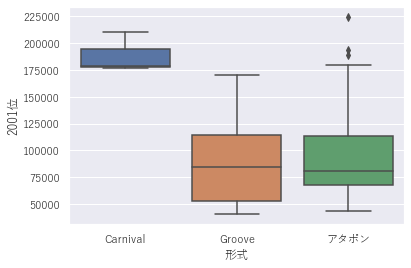

In [6]:
# 形式vs2001位ボーダー
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.set(font='Yu Gothic')
sns.boxplot(x='形式', y='2001位', data=df, ax=ax)

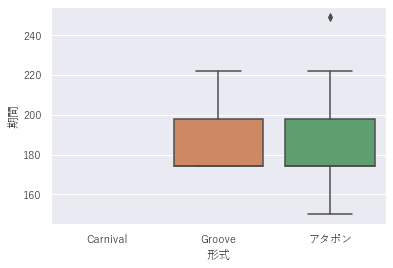

In [7]:
# 形式vs期間
# - Carnivalは期間データなし
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.set(font='Yu Gothic')
sns.boxplot(x='形式', y='期間', data=df, ax=ax)

### 属性

In [8]:
# 属性別
# 属性があるのはGrooveのみ
# --Da--
# - 2001位: min, mid, maxすべて一番小さい
# --Vi--
# - 2001位: 全体的に一番大きい。75%値だけ一番小さい
# --Vo--
# - 2001位: 中間くらい。25%値は一番小さい。75%値は一番大きい
df.groupby('属性').describe().T

属性                      Da             Vi             Vo
2001位 count      10.000000      11.000000      11.000000
      mean    81120.200000   92813.272727   86673.272727
      std     32024.021240   38595.894046   37182.301884
      min     40096.000000   46300.000000   42544.000000
      25%     54767.250000   64639.500000   49871.000000
      50%     78106.500000   82143.000000  100476.000000
      75%    110899.250000  110700.000000  118864.500000
      max    127482.000000  170014.000000  140000.000000
期間    count      10.000000      11.000000      11.000000
      mean      183.600000     189.545455     191.454545
      std        16.780942      19.200852      18.869889
      min       174.000000     174.000000     174.000000
      25%       174.000000     174.000000     174.000000
      50%       174.000000     177.000000     198.000000
      75%       192.000000     198.000000     198.000000
      max       222.000000     222.000000     222.000000

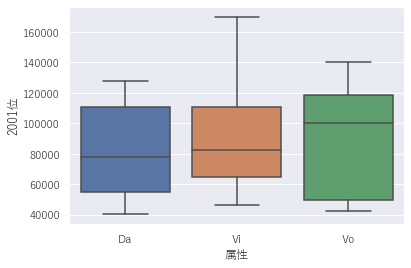

In [9]:
# 属性vs2001位ボーダー
# 属性があるのはGrooveのみ
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.set(font='Yu Gothic')
sns.boxplot(x='属性', y='2001位', data=df[df['形式']=='Groove'], ax=ax)

### 期間

In [10]:
# 数値データの相関行列
# 相関はなさそう
df.corr()

,2001位,期間
2001位,1.000000,-0.126082
期間,-0.126082,1.000000


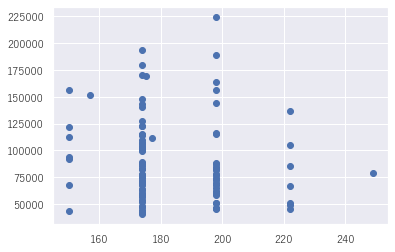

In [11]:
# 期間vs2001位ボーダー
# 期間が長いほどボーダーが高いかと思ったが、そうでもない
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.loc[:, '期間']
y = df.loc[:, '2001位']
ax.scatter(x, y)
plt.show()

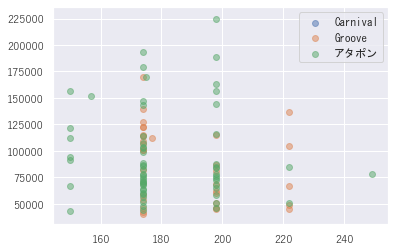

In [12]:
# 期間vs2001位ボーダー
# 形式ごとに色分けしてプロット
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    x = df.loc[df['形式'] == event, '期間']
    y = df.loc[df['形式'] == event, '2001位']
    ax.scatter(x, y, label=event, alpha=0.5)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()

### 日付

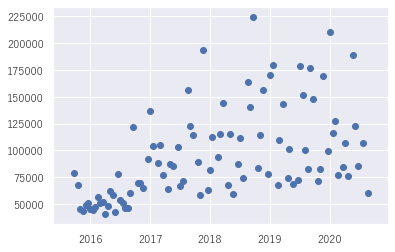

In [13]:
# 日付vs2001位ボーダー
# だんだん上がっているように見える
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.loc[:, '日付']
y = df.loc[:, '2001位']
ax.scatter(x, y)
plt.show()

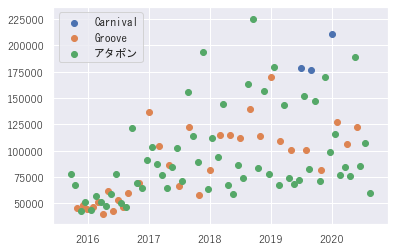

In [14]:
# 日付vs2001位ボーダー
# 形式ごとに色分けしてプロット
# アタポンのばらつきが大きい
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    x = df.loc[df['形式'] == event, '日付']
    y = df.loc[df['形式'] == event, '2001位']
    ax.scatter(x, y, label=event)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()

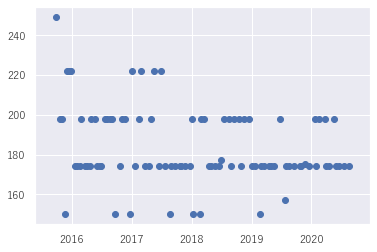

In [15]:
# 日付vs期間
# 2018年以降は200以下
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.loc[:, '日付']
y = df.loc[:, '期間']
ax.scatter(x, y)
plt.show()

## メモ

* 形式
  * Carnivalはデータ数少ないから分析は厳しい
  * まずはデータ数が一番多いアタポンから手を付けるのが良さそう
* 属性
  * 大きな傾向の違いはなさそう
  * 属性があるのはGrooveのみ
* 期間
  * 期間が長いほどボーダーが高いかと思ったが、そうでもなかった
  * 関係性ゼロではないと思うが、他の要因のほうが強いのかも
* 日付
  * 傾向として、だんだん上がってるように見える
  * 思いつく仮説は以下
    * プレイヤーが増えて争いが激しくなってる
    * イベント効率が上がっている
      * キャラ性能の向上
      * 楽曲、モード（グランドライブなど）の追加
* その他考えられる要因
  * イベント毎のバラつき
    * イベント報酬
    * イベント楽曲のポイント効率
      * ノーツ数など